Start with autoreload magic; this reloads modules automatically before entering the execution of code and thus enabled development in modules like util.py

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from glob import glob
from subprocess import check_call
import config
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import util

In [3]:
#droot = f"{config.project_tmpdir}/simulation-data/CAMS_LMDZ"
droot = "/glade/p/eol/stephens/longcoll/apo-simulation-data/CAMS_LMDZ"
os.makedirs(droot, exist_ok=True)
files = [
    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFAPO_OCN.carboscope.apo99X_v2021.txt'
    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFCO2_FF.GCP-GridFED.v2021.3.txt'
    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFCO2_FF.OCO2-MIP.v2020.1.txt'
    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFCO2_OCN.cesm_fosi_smyle.txt'
    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFCO2_OCN.MPI-SOM-FFN.txt'
    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFN2_OCN.cesm_fosi_smyle.txt'
    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFN2_OCN.era5_shf.txt'
    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFO2_FF.GCP-GridFED.v2021.3.txt'
    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFO2_OCN.cesm_fosi_smyle.txt'
    'http://dods.lsce.ipsl.fr/invsat/ForML/APO/XSFO2_OCN.gk2001_R2016.repeat_monclim.txt'
]

directories = []
for f in files:
    txt_file = f'{droot}/{os.path.basename(f)}'
    
    if not os.path.exists(f):
        continue
        check_call(['wget', f], cwd=droot)

copying from:
https://ncar.github.io/so-co2-airborne-obs/_prestage-obs/process_surface_models.html

		# for CAMS, first read in obs
		stanc=nc_open(paste(obsobspackdir,'/co2_',tolower(sta),'_',type,'-',meth,'_',labid,'_',filt,'.nc',sep=''))
                stadat=data.frame(cbind(ncvar_get(stanc,'time_decimal'),t(ncvar_get(stanc,'time_components')),ncvar_get(stanc,'value')*1E6)) ; colnames(stadat)=c('date','year','mon','day','hour','min','sec','co2')
		system('rm cams_station_data_temp.txt')
		if(case==1){ 
			modobspackfile=paste(modobspackdir,'/simulated-obs',subdir,'/',modobspacktotfile,sep='')
		} else if(case==3){
			modobspackfile=paste(modobspackdir,'/simulated-obs',subdir,'/',modobspackfosfile,sep='')
		} else if(case==4){
			modobspackfile=paste(modobspackdir,'/simulated-obs',subdir,'/',modobspackocefile,sep='')
		} else if(case==5){
			modobspackfile=paste(modobspackdir,'/simulated-obs',subdir,'/',modobspacklndfile,sep='')
		}
		system(paste('grep co2_',tolower(sta),'_',type,'-',meth,'_',labid,'_',filt,' ',modobspackfile,' > cams_station_data_temp.txt',sep=''))
		camsin=read.table('cams_station_data_temp.txt',stringsAsFactors=F) # obspackid, posterior co2, flag (all 0s)
		ids=ncvar_get(stanc,'obspack_id')
		stadat$co2=rep(NA,nrow(stadat)) # remove old
                stadat$co2[is.element(ids,camsin[,1])]=camsin[,2][match(ids[is.element(ids,camsin[,1])],camsin[,1])]


and copying from:
https://ncar.github.io/so-co2-airborne-obs/_prestage-obs/process_aircraft_models.html

    obsobspackdir=paste(project_tmpdir_obs,'/',gvp60dir,sep='') # read in actual data files from same GV+ version, then swap in from single CAMS file
	orcnc=nc_open(paste(obsobspackdir,'/co2_orc_aircraft-insitu_3_allvalid-merge10.nc',sep=''))
	tomnc=nc_open(paste(obsobspackdir,'/co2_tom_aircraft-insitu_1_allvalid.nc',sep=''))
	hipnc=nc_open(paste(obsobspackdir,'/co2_hip_aircraft-insitu_59_allvalid.nc',sep=''))

	if(case==1){
		modobspackfile=paste(modobspackdir,'/simulated-obs',subdir,'/',modobspacktotfile,sep='')
	} else if(case==3){
		modobspackfile=paste(modobspackdir,'/simulated-obs',subdir,'/',modobspackfosfile,sep='')
	} else if(case==4){
		modobspackfile=paste(modobspackdir,'/simulated-obs',subdir,'/',modobspackocefile,sep='')
	} else if(case==5){
		modobspackfile=paste(modobspackdir,'/simulated-obs',subdir,'/',modobspacklndfile,sep='')
	}

	orcdat=data.frame(cbind(t(ncvar_get(orcnc,'time_components')),ncvar_get(orcnc,'altitude'),ncvar_get(orcnc,'latitude'),ncvar_get(orcnc,'longitude'),ncvar_get(orcnc,'value')*1E6),ncvar_get(orcnc,'obspack_id')) ; colnames(orcdat)=c('year','mon','day','hour','min','sec','alt','lat','lon','co2','obspack_id')
	system('rm cams_orcas_data_temp.txt')
	system(paste('grep co2_orc_aircraft-insitu_3_allvalid-merge10 ',modobspackfile,' > cams_orcas_data_temp.txt',sep=''))
	camsin=read.table('cams_orcas_data_temp.txt',stringsAsFactors=F) # obspackid, posterior co2, flag (all 0s)
	orcdat$co2=rep(NA,nrow(orcdat)) # remove old
	orcdat[is.element(orcdat$obspack_id,camsin[,1]),'co2']=camsin[match(orcdat$obspack_id[is.element(orcdat$obspack_id,camsin[,1])],camsin[,1]),2]

	tomdat=data.frame(cbind(t(ncvar_get(tomnc,'time_components')),ncvar_get(tomnc,'altitude'),ncvar_get(tomnc,'latitude'),ncvar_get(tomnc,'longitude'),ncvar_get(tomnc,'value')*1E6),ncvar_get(tomnc,'obspack_id')) ; colnames(tomdat)=c('year','mon','day','hour','min','sec','alt','lat','lon','co2','obspack_id')
	system('rm cams_atom_data_temp.txt')
	system(paste('grep co2_tom_aircraft-insitu_1_allvalid ',modobspackfile,' > cams_atom_data_temp.txt',sep=''))
	camsin=read.table('cams_atom_data_temp.txt',stringsAsFactors=F) # obspackid, posterior co2, flag (all 0s)
	tomdat$co2=rep(NA,nrow(tomdat)) # remove old
	tomdat[is.element(tomdat$obspack_id,camsin[,1]),'co2']=camsin[match(tomdat$obspack_id[is.element(tomdat$obspack_id,camsin[,1])],camsin[,1]),2]

	hipdat=data.frame(cbind(t(ncvar_get(hipnc,'time_components')),ncvar_get(hipnc,'altitude'),ncvar_get(hipnc,'latitude'),ncvar_get(hipnc,'longitude'),ncvar_get(hipnc,'value')*1E6),ncvar_get(hipnc,'obspack_id')) ; colnames(hipdat)=c('year','mon','day','hour','min','sec','alt','lat','lon','co2','obspack_id')
	system('rm cams_hippo_data_temp.txt')
	system(paste('grep co2_hip_aircraft-insitu_59_allvalid ',modobspackfile,' > cams_hippo_data_temp.txt',sep=''))
	camsin=read.table('cams_hippo_data_temp.txt',stringsAsFactors=F) # obspackid, posterior co2, flag (all 0s)
	hipdat$co2=rep(NA,nrow(hipdat)) # remove old
	## not all v4.2.1 ids are in reported CAMS output, but all reported CAMS output is in v4.2.1
	hipdat[is.element(hipdat$obspack_id,camsin[,1]),'co2']=camsin[match(hipdat$obspack_id[is.element(hipdat$obspack_id,camsin[,1])],camsin[,1]),2]

(note, obsobspackdir should point to GV+ 7.0 now)
    

### Contribution details
- 10 text files in CAMS-specific format, one each corresponding to requested tracers
- within each of which are 460,635 rows and 2 columns (ObsPack ID and Value)
- it is necessary to match ObsPack ID to the original file
- Example first three lines:

LJO_obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18\~co2_ljo_surface-flask_4_representative\~13859752 406.65870540710057

LJO_obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18\~co2_ljo_surface-flask_4_representative\~13859753 395.99932744773474

ALT_obspack_co2_1_GLOBALVIEWplus_v7.0_2021-08-18\~co2_alt_surface-flask_4_representative\~13856865 395.0473775069313

In [ ]:
# below here from TM3_Jena quicklook

In [52]:
# need the reverse of prior cell:
#def create_filename(method, type, station, institution)
# return filename

# for now, hard code Scripps flask CBA and PSA
filename1 = 'FrCBAso.co2.ts'
filename2 = 'FrPSAso.co2.ts'

In [96]:
droot = f"{config.project_tmpdir}/simulation-data/TM3-Jena"

# should parse tracer names out of file names above, hard coding here
tracers = [
    'apojena', 'co2cesm', 'co2gridfed', 'co2oco2mip', 'co2somffn', 
    'n2cesm', 'n2era', 'o2cesm', 'o2gk01r16', 'o2gridfed'
]

dtracer = f"PRI_{tracers[0]}_output1.vGV7.sGV7"
path = f"{droot}/{dtracer}/{filename1}"
print(path)
df = pd.read_csv(path, delim_whitespace=True, header=0) # , na_values=-599.0000)
df.columns = ['year.frac', 'year', 'month', 'day', 'hour', 'minute', 'second', 'lat', 'lon', 'hgt', 'obs', 'sigma', tracers[0]] 
    
for t in tracers[1:]:
    
    dtracer = f"PRI_{t}_output1.vGV7.sGV7"
    path = f"{droot}/{dtracer}/{filename1}"

# 1995.624258 1995  8 16 20 30  0   55.21 -162.72     31   351.705       1.04403       347.1162735968828
# 1995.627454 1995  8 18  0 30  0   55.21 -162.72     31   349.695       1.04403       347.1164677590132
    print(path)
    
    tmp = pd.read_csv(path, delim_whitespace=True, header=0) # , na_values=-599.0000)
    tmp.columns = ['year.frac', 'year', 'month', 'day', 'hour', 'minute', 'second', 'lat', 'lon', 'hgt', 'obs', 'sigma', t] 
    df[t] = tmp[t]
    
df['time'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])
df = df.set_index('time')
df = df.dropna()
df = df.rename({'apojena': 'apo_jena', 'co2cesm': 'co2_cesm', 'co2gridfed': 'co2_gridfed', 'co2oco2mip': 'co2_oco2mip', 'co2somffn': 'co2_somffn', 
    'n2cesm': 'n2_cesm', 'n2era': 'n2_era', 'o2cesm': 'o2_cesm', 'o2gk01r16': 'o2_gk01r16', 'o2gridfed': 'o2_gridfed'}, axis=1)

# cutting and pasting here - need to make station dynamic:
dtracer = f"PRI_{tracers[0]}_output1.vGV7.sGV7"
path = f"{droot}/{dtracer}/{filename2}"
print(path)
df2 = pd.read_csv(path, delim_whitespace=True, header=0) # , na_values=-599.0000)
df2.columns = ['year.frac', 'year', 'month', 'day', 'hour', 'minute', 'second', 'lat', 'lon', 'hgt', 'obs', 'sigma', tracers[0]] 
    
for t in tracers[1:]:
    
    dtracer = f"PRI_{t}_output1.vGV7.sGV7"
    path = f"{droot}/{dtracer}/{filename2}"

    print(path)
    
    tmp = pd.read_csv(path, delim_whitespace=True, header=0) # , na_values=-599.0000)
    tmp.columns = ['year.frac', 'year', 'month', 'day', 'hour', 'minute', 'second', 'lat', 'lon', 'hgt', 'obs', 'sigma', t] 
    df2[t] = tmp[t]
    
df2['time'] = pd.to_datetime(df2[['year', 'month', 'day', 'hour', 'minute']])
df2 = df2.set_index('time')
df2 = df2.dropna()
df2 = df2.rename({'apojena': 'apo_jena', 'co2cesm': 'co2_cesm', 'co2gridfed': 'co2_gridfed', 'co2oco2mip': 'co2_oco2mip', 'co2somffn': 'co2_somffn', 
    'n2cesm': 'n2_cesm', 'n2era': 'n2_era', 'o2cesm': 'o2_cesm', 'o2gk01r16': 'o2_gk01r16', 'o2gridfed': 'o2_gridfed'}, axis=1)

/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_apojena_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_co2cesm_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_co2gridfed_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_co2oco2mip_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_co2somffn_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_n2cesm_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_n2era_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_o2cesm_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_o2gk01r16_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena

In [99]:
# subtract off background value

""" 
For technical reasons (because the runs have formally been done as CO2
runs to be able to use the CO2 obspack input), an initial condition of

    347.0120 ppm

has been added to the output files (but the actual transport runs have
been done from a zero atmosphere).
"""

sno_vars = [
    'apo_jena',
    'o2_cesm', 
    'o2_gk01r16',  
    'o2_gridfed',   
    'co2_cesm', 
    'co2_somffn', 
    'co2_gridfed', 
    'co2_oco2mip', 
    'n2_cesm', 
    'n2_era', 
]

for v in sno_vars:
    df[v]=df[v]-347.0120
    df2[v]=df2[v]-347.0120

In [100]:
# add derived APO variables

df['apo_cesm'] = util.compute_apo (
    o2=df['o2_cesm'],
    co2=df['co2_cesm'],
    n2=df['n2_cesm']
)

df['apo_diss'] = util.compute_apo (
    o2=df['o2_gk01r16'],
    co2=df['co2_somffn'],
    n2=df['n2_era']
)

df['apo_gridfed'] = util.compute_apo (
    o2=df['o2_gridfed'],
    co2=df['co2_gridfed'],
    n2=0.0
)

df['apo_oco2mip'] = util.compute_apo (
    o2=df['co2_oco2mip'] * -1.4,
    co2=df['co2_oco2mip'],
    n2=0.0
)

# kluge - need to make station name dynamic and allow any number of stations
df2['apo_cesm'] = util.compute_apo (
    o2=df2['o2_cesm'],
    co2=df2['co2_cesm'],
    n2=df2['n2_cesm']
)

df2['apo_diss'] = util.compute_apo (
    o2=df2['o2_gk01r16'],
    co2=df2['co2_somffn'],
    n2=df2['n2_era']
)

df2['apo_gridfed'] = util.compute_apo (
    o2=df2['o2_gridfed'],
    co2=df2['co2_gridfed'],
    n2=0.0
)

df2['apo_oco2mip'] = util.compute_apo (
    o2=df2['co2_oco2mip'] * -1.4,
    co2=df2['co2_oco2mip'],
    n2=0.0
)

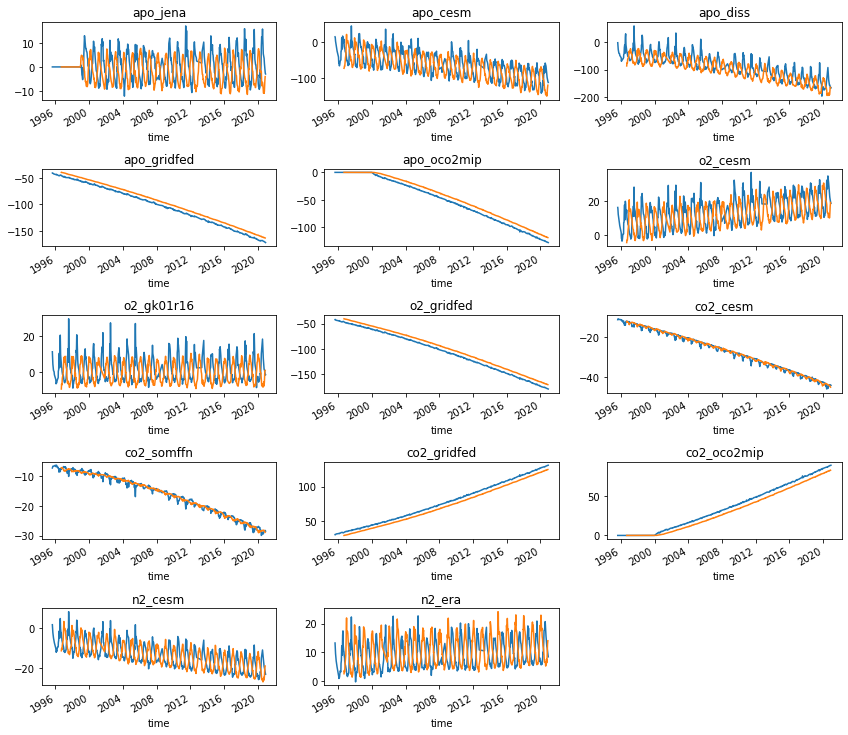

In [101]:
# make plots

sno_vars = [
    'apo_jena',
    'apo_cesm',
    'apo_diss',
    'apo_gridfed',
    'apo_oco2mip',
    'o2_cesm', 
    'o2_gk01r16',  
    'o2_gridfed',   
    'co2_cesm', 
    'co2_somffn', 
    'co2_gridfed', 
    'co2_oco2mip', 
    'n2_cesm', 
    'n2_era', 
]

n_plots = len(sno_vars)
ncol = int(np.sqrt(n_plots))
nrow = int(((n_plots / ncol) + n_plots % ncol))
fig, axs = plt.subplots(nrow, ncol, figsize=(12, 12), squeeze=False)

for n, v in enumerate(sno_vars):
    ip, jp = np.unravel_index(n, axs.shape)
    
    ax = axs[ip, jp]
    df[v].plot(ax=ax)
    df2[v].plot(ax=ax)
    ax.set_title(v)

plt.tight_layout();    

for n in range(n+1, nrow*ncol):
    ip, jp = np.unravel_index(n, (nrow, ncol))
    axs[ip, jp].remove()

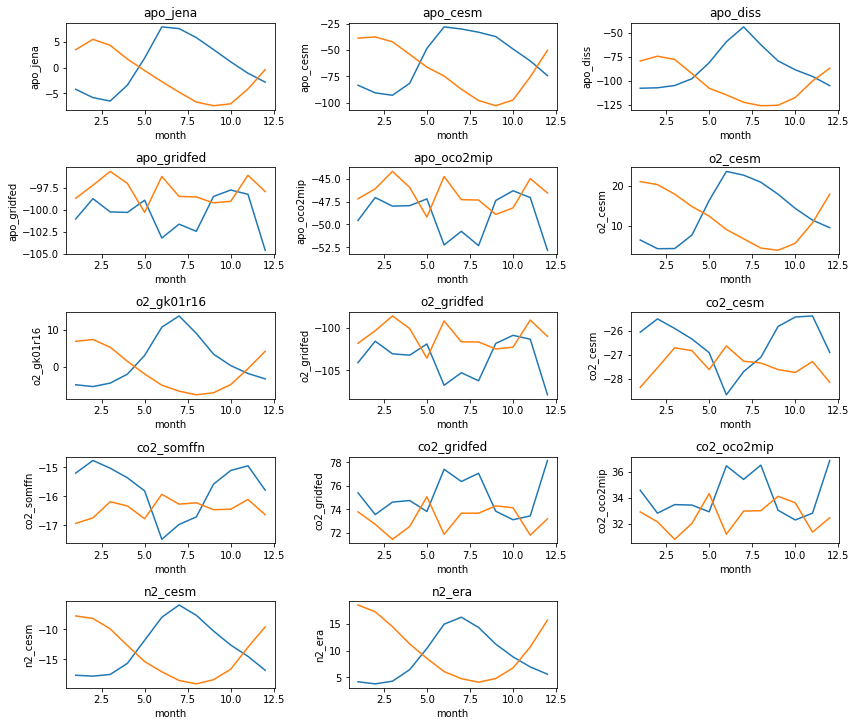

In [102]:
# seasonal climatology
ds = df.to_xarray()
ds_seas=ds.groupby('time.month').mean('time')
ds_seas['apo_cesm']

# kluge - need to make station name dynamic and allow any number of stations
ds2 = df2.to_xarray()
ds2_seas=ds2.groupby('time.month').mean('time')
ds2_seas['apo_cesm']

fig, axs = plt.subplots(nrow, ncol, figsize=(12, 12), squeeze=False)

for n, v in enumerate(sno_vars):
    ip, jp = np.unravel_index(n, axs.shape)
    
    ax = axs[ip, jp]
    ds_seas[v].plot(ax=ax)
    ds2_seas[v].plot(ax=ax)
    ax.set_title(v)

plt.tight_layout();    

for n in range(n+1, nrow*ncol):
    ip, jp = np.unravel_index(n, (nrow, ncol))
    axs[ip, jp].remove()
    